# Python Tutorial - Part 3

---
<a id='try_except'></a>
# Try/Except

---

Python provides a method to trap errors with the code at run time to prevent the script crashing. For example, the following program will prompt for a number and  print it out. It will continue prompting until the exit condition is reached.

It takes a string as input and converts it to an integer.

There is a problem with this code in that if text other than a number was entered, for example "2d", the script would crash. Try running the code with numbers and non-numeric entries:


In [1]:

print ("Type Control C or -1 to exit")
number = 1
while number != -1:
    number = int(input("Enter a number: "))
    print ("You entered:", number)
    if number % 2 == 0:
        print ("You entered an even number")
    else:
        print ("You entered an odd number")
    

Type Control C or -1 to exit
Enter a number: 2d


ValueError: invalid literal for int() with base 10: '2d'


This can be prevented using <b>try/except</b>:
    

In [ ]:

print ("Type Control C or -1 to exit")
number = 1
while number != -1:
    try: 
        number = int(input("Enter a number: "))
        print ("You entered:", number)
        if number % 2 == 0:
            print ("You entered an even number")
        else:
            print ("You entered an odd number")
    except ValueError:
        print ("That was not a number")
    

Type Control C or -1 to exit
Enter a number: 2d
That was not a number
Enter a number: 1
You entered: 1
You entered an odd number
Enter a number: 1
You entered: 1
You entered an odd number



Now when something like <b>"2d"</b> is entered it prints <b>"That was not a number"</b> and continues without exiting.

Multiple errors can be caught using more than one except if necessary. In particular, this example will only catch a ValueError but there are many other errors that can be caught e.g.ZeroDivisionError etc.



---
<a id='reg_exp'></a>

# Regular Expressions

---

A regular expression (regex) is a special text string for describing a search pattern. In Python regular expressions are provided by the regular expression (re) module. The re module provides an interface to the regular expression engine, allowing you to compile REs into objects and then perform matches with them. This enables far more complex search patterns to be created than are possible with the built in string methods detailed previously.

To compile and use a re:

In [ ]:
import re

p = re.compile(r'\d+')   # Match any digits
m = p.match('1 to 45')  # Apply the re
if m:
    print ('Match found')
else:
    print ('No match')
                          

Note the 'r' as part of the regular expression, it stands for 'raw string'. The backslash character is used in regular expressions to indicate special forms or to allow special characters to be used without invoking their special meaning. However, this collides with Python’s usage of the same character for the same purpose in string literals; for example "\b" the word boundary regular expression is the character for a backspace in Python. To avoid this confusion the raw string is used, so 'r"\b"' is a two-character string for a word boundary, whereas "\b" is a one-character string for a backspace.

The 'r' isn’t essential for all regular expressions but it should generally be used in all cases to ensure the expression is interpreted correctly.

In an RE there are plenty of special characters, and it is these that both give them their power and make them appear very complicated. It's best to build up your use of REs slowly; their creation can be something of an art form.

Here are some special RE characters and their meaning

    .      # Any single character except a newline
    ^      # The beginning of the line or string
    $      # The end of the line or string
    *      # Zero or more of the last character
    +      # One or more of the last character
    ?      # Zero or one of the last character
    
Example matches:

    t.e       # t followed by anthing followed by e
              # This will match the, tre and tle and but not te or tale
    ^f        # f at the beginning of a line
    ^ftp      # ftp at the beginning of a line
    e$        # e at the end of a line 
tle$      # tle at the end of a line
    und*      # un followed by zero or more d characters
              # This will match un, und, undd, unddd (etc)
    .*        # Any string without a newline. This is because the . matches
              # anything except a newline and the * means zero or more of these
    ^$        # A line with nothing in it
    
There are even more options. Square brackets are used to match any one of the characters inside them. Inside square brackets a - indicates "between" and a ^ at the beginning means "not":

    [qjk]        # Either q or j or k
    [^qjk]       # Neither q nor j nor k
    [a-z]        # Anything from a to z inclusive
    [^a-z]       # No lower case letters
    [a-zA-Z]     # Any letter
    [a-z]+       # Any non-zero sequence of lower case letters

A vertical bar | represents an "or" and parentheses (...) can be used to group things together:

    jelly|cream    # Either jelly or cream
    (eg|le)gs      # Either eggs or legs
    (da)+          # Either da or dada or dadada or...

Here are some more special characters:

    \n        # A newline
    \t        # A tab
    \w        # Any alphanumeric (word) character.
              # The same as [a-zA-Z0-9_]
    \W        # Any non-word character. The same as [^a-zA-Z0-9_]
    \d        # Any digit. The same as [0-9]
    \D        # Any non-digit. The same as [^0-9]
    \s        # Any whitespace character: space, tab, newline, etc
    \S        # Any non-whitespace character
    \b        # A word boundary, outside [] only
    \B        # No word boundary

Clearly characters like |, [, ), \, / and so on are peculiar cases in regular expressions. If you want to match for one of those then you have to preceed it by a backslash. So:

    \|        # Vertical bar
    \[        # An open square bracket
    \)        # A closing parenthesis
    \*        # An asterisk
    \^        # A carat symbol
    \/        # A slash
    \\        # A backslash

and so on.

Some example REs

    [01]          # Either "0" or "1"
    \/0           # A division by zero: "/0"
    \/ 0          # A division by zero with a space: "/ 0"
    \/\s0         # A division by zero with a whitespace:
                  # "/ 0" where the space may be a tab etc.
    \/ *0         # A division by zero with possibly some
                  # spaces: "/0" or "/ 0" or "/  0" etc.
    \/\s*0        # A division by zero with possibly some whitespace.
    \/\s*0\.0*    # As the previous one, but with decimal point and maybe
                  # some 0s after it. Accepts "/0." and  "/0.0" and "/0.00"
                  # etc and "/ 0." and "/  0.0" and "/   0.00" etc.



---
<a id='search_findall'></a>
## Search and Findall

---

The <b>match</b> method only checks if the RE matches at the start of a string.

The <b>search</b> method matches anywhere within the string.


In [ ]:

import re

p = re.compile(r'\d+')   # Match any digits
m = p.match('Try 1 to 45')  # Apply the re

if m:
    print ('Match found')
else:
    print ('No match')

m = p.search('Try 1 to 45')  # Apply the re
   
if m:
    print ('Search found')
    
else:
    print ('No search found' )


A biological example of using a regular expression is to search for the presence of a restriction enzyme site in a DNA sequence. For example, to see if the sequence contains the EcoRI site:

In [ ]:

import re

p = re.compile(r"GAATTC")  
dna = "ATCGCGAATTCAC"
if p.search(dna):
    print("EcoRI restriction site found!")
else:
    print("EcoRI restriction site not found!")
    

You don't have to produce a re object and call its methods; the re module also provides top-level functions called match(), search(), sub(), etc. 

These functions take the same arguments as the corresponding object method, with the RE string added as the first argument, and still return either None or an object instance. 

In [ ]:

import re

dna = "ATCGCGAATTCAC"
if re.search(r"GAATTC", dna):
    print("EcoRI restriction site found!")
else:
     print("EcoRI restriction site not found!")


If a re is to be used more than once the compiled version is probably more efficient but for a single search the module level function may be preferred.

The restriction enzyme AvaII matches 2 sites, GGACC and GGTCC, which could be searched using:

In [ ]:

import re

dna = "ATCGCGAATTCAC"
if re.search(r"GGACC", dna) or re.search(r"GGTCC", dna):
    print("AvaII restriction site found!")
else:
    print("AvaII restriction site not found!")


However, this can be improved with a single regular expression:

In [ ]:

import re

dna = "ATCGCGAATTCAC"
if re.search(r"GG(A|T)CC", dna):
    print("AvaII restriction site found!")
else:
    print("AvaII restriction site not found!")


If there are multiple options they can be grouped in square brackets rather than using individual ‘|’. The BisI restriction enzyme pattern is GCNGC, where N represents any base. This can searched with:

In [ ]:

import re

dna = "ATCGCGGCTTCAC"
if re.search(r"GC[ATGC]GC", dna):
    print("BisI restriction site found!")
else:
    print("BisI restriction site not found!")


There are many options for matching characters listed above, for example ‘.’ Matches any character, ‘?’ matches zero or more of the last character etc.

When used in combination complex patterns can be created. For example, to match full length eukaryotic mRNA sequences:

&nbsp;&nbsp;<b>^ATG[ATGC]{30,1000}A{5,10}$</b>

Matches:

&nbsp;&nbsp;An ATG start codon at the beginning of the sequence<br>
&nbsp;&nbsp;Followed by between 30 and 1000 bases which can be A, T, G or C<br>
&nbsp;&nbsp;Finally, a poly-A tail of between 5 and 10 bases at the end of the sequence<br>
    
The re match object has methods and attributes that can be used to return information about the matching string. The most important ones are: 

&nbsp;&nbsp;<b>group()</b>&nbsp;&nbsp;Return the string matched by the RE<br>
&nbsp;&nbsp;<b>start()</b>&nbsp;&nbsp;Return the starting position of the match<br>
&nbsp;&nbsp;<b>end()</b>&nbsp;&nbsp;Return the ending position of the match<br>
&nbsp;&nbsp;<b>span()</b>&nbsp;&nbsp;Return a tuple containing the (start, end) positions of the match<br>	

To match specific patterns within a string the group can be used.with search:


In [1]:

import re

dna = "ATGACGTACGTACGACTG"
# store the match object in the variable m
m = re.search(r"GA[ATGC]{3}AC", dna)
print(m.group())


GACGTAC


If you want to extract more than one group parenthesis are used in the match and referred to in numerical order:  

In [2]:

import re

dna = "ATGACGTACGTACGACTG"
# store the match object in the variable m
m = re.search(r"GA([ATGC]{3})AC([ATGC]{2})AC", dna)
print("Entire match: " + m.group())
print("First part: " + m.group(1))
print("Second part: " + m.group(2))
GACGTACGTACGAC

Entire match: GACGTACGTAC
First part: CGT
Second part: GT



The start and end positions can be extracted with the start() and end() functions:

In [45]:

import re

dna = "ATGACGTACGTACGACTG"
m = re.search(r"GA([ATGC]{3})AC([ATGC]{2})AC", dna)
print(m)
print("Start position: " + str(m.start()))
print("End position: " + str(m.end()))


<re.Match object; span=(2, 13), match='GACGTACGTAC'>
Start position: 2
End position: 13


The start and ends of individual groups can also be extracted:

In [6]:

import re

dna = "ATGACGTACGTACGACTG"
m = re.search(r"GA([ATGC]{3})AC([ATGC]{2})AC", dna)
print("Start position: " + str(m.start()))
print("End position: " + str(m.end()))
print("Group one start: " + str(m.start(1)))
print("Group one end: " + str(m.end(1)))
print("Group two start: " + str(m.start(2)))
print("Group two end: " + str(m.end(2)))


Start position: 2
End position: 13
Group one start: 4
Group one end: 7
Group two start: 9
Group two end: 11


The re method findall() returns a list of all the matching strings. To find all runs of A and T in a DNA sequence longer than five bases:

In [7]:

import re

dna = "ACTGCATTATATCGTACGAAATTATACGCGCG"
atrun = re.findall(r"[AT]{4,100}", dna)
print(atrun)


['ATTATAT', 'AAATTATA']


An alternative, which provides greater flexibility, is finditer(). This returns a sequence of match objects which can be accessed in a loop:


In [8]:

import re

dna = "ACTGCATTATATCGTACGAAATTATACGCGCG"
runs = re.finditer(r"[AT]{3,100}", dna)
for match in runs:
    run_start = match.start()
    run_end = match.end()
    print("AT rich region from " + str(run_start) + " to " + str(run_end))

                                

AT rich region from 5 to 12
AT rich region from 18 to 26


Regular expressions provide extensive ability to search and manipulate text.

---

## Exercise 19

a) Write a script that opens a text file and checks each line for the presence of a particular word. Keep track of the line number and if a word is found print the line number and number of instances of the word.

You can use the entamoeba.txt file for this exercise available on the <a href="http://teaching.bc.ic.ac.uk/msc/ipython-files/exercises.html">Exercise Answers</a> page. A suitable word to match may be “and”.

b) Modify the script so that word to search for is prompted for when the script runs and is input by the user. You will need to use the input method for this.

(Answers to all exercises are available <a href="http://teaching.bc.ic.ac.uk/msc/ipython-files/exercises.html">here</a>.)


In [13]:
import re
with open('entamoeba.txt') as in_file:
    count = 0
    for line in in_file:
        m = re.findall(r"and", line)
        count+=1
        if 'and' in m:
            print('line' + str(count))
            print('number of ands = ' + str(len(m)))

    

line12
number of ands = 1
line85
number of ands = 1
line90
number of ands = 1
line174
number of ands = 1
line179
number of ands = 1
line257
number of ands = 1
line268
number of ands = 1
line272
number of ands = 1
line278
number of ands = 1
line284
number of ands = 1
line288
number of ands = 1
line425
number of ands = 1
line431
number of ands = 1
line551
number of ands = 1
line555
number of ands = 1
line559
number of ands = 1
line563
number of ands = 1
line567
number of ands = 1
line571
number of ands = 1
line627
number of ands = 1
line683
number of ands = 1
line687
number of ands = 1
line691
number of ands = 1
line744
number of ands = 1
line748
number of ands = 1
line752
number of ands = 1
line1243
number of ands = 1
line1365
number of ands = 1
line1369
number of ands = 1
line1373
number of ands = 1
line1442
number of ands = 1
line1450
number of ands = 1
line1454
number of ands = 1
line1458
number of ands = 1
line1464
number of ands = 1
line1487
number of ands = 1
line1517
number of an

In [22]:
import re
with open('entamoeba.txt') as in_file:
    count = 0
    word = str(input("Enter a word: "))
    for line in in_file:
        m = re.findall(r"%s"%word, line)
        count+=1
        if '%s'%word in m:
            print('line' + str(count))
            print('number of %s = '%word + str(len(m)))

    


Enter a word: gene
line24
number of gene = 1
line104
number of gene = 1
line191
number of gene = 1
line291
number of gene = 1
line322
number of gene = 1
line354
number of gene = 1
line387
number of gene = 1
line434
number of gene = 1
line463
number of gene = 1
line485
number of gene = 1
line514
number of gene = 1
line577
number of gene = 1
line603
number of gene = 1
line636
number of gene = 1
line662
number of gene = 1
line694
number of gene = 1
line715
number of gene = 1
line1255
number of gene = 1
line1272
number of gene = 1
line1298
number of gene = 1
line1319
number of gene = 1
line1338
number of gene = 1
line1378
number of gene = 1
line1397
number of gene = 1
line1420
number of gene = 1
line1467
number of gene = 1
line1492
number of gene = 1
line1520
number of gene = 1
line1549
number of gene = 1
line1575
number of gene = 1
line1598
number of gene = 1
line1625
number of gene = 1
line1646
number of gene = 1
line1667
number of gene = 1
line1689
number of gene = 1
line1718
number of 

In [ ]:
word = str(input("Enter a word: "))
print('hello %s'%word)


---
<a id='split'></a>
# Split

---

Strings can also be split using re patterns as the string delimiter: 


In [ ]:

import re

p = re.compile(r'\d+') # Set any digits to be the delimiter

l = p.split('There are 2 numbers and 8 words in this string.')

print (l)


With the maximum split number set:


In [71]:

import re

p = re.compile(r'\d+') # Set any digits to be the delimiter

l = p.split('There are 2 numbers and 8 words in this string.', 1)

print (l)


['There are ', ' numbers and 8 words in this string.']



An example is a consensus DNA sequence that contains ambiguity codes and you want to extract all of the runs of contiguous unambiguous bases. Split can be used to split the DNA string wherever there is a base that isn't A, T, G or C:


In [ ]:

import re

dna = "ACTNGCATRGCTACGTYACGATSCGA"

p = re.compile(r"[^ATGC]")
unambig = p.split(dna)

print (unambig)


The ^ at the start means split on everything except ATG and C.

If capturing parentheses are used in the re, then everything is returned in the list, including the ambiguity codes where the split was made:
    

In [ ]:

import re

dna = "ACTNGCATRGCTACGTYACGATSCGA"

p = re.compile(r"([^ATGC])")
unambig = p.split( dna)

print (unambig)



Note the module-level function <b>re.split()</b> adds the re to be used as the first argument, but is otherwise the same. 

In [70]:

import re

dna = "ACTNGCATRGCTACGTYACGATSCGA"

l = re.split(r"[^ATGC]", dna)
    
print (l)


['ACT', 'GCAT', 'GCTACGT', 'ACGAT', 'CGA']



---

## Exercise 20

Modify the previous script to take one command line string and split any line that contains that string. Print out each element of the list produced by split on a separate, numbered, line.

You can use the entamoeba.txt file for this exercise available on the <a href="http://teaching.bc.ic.ac.uk/msc/ipython-files/exercises.html">Exercise Answers</a> page. 

(Answers to all exercises are available <a href="http://teaching.bc.ic.ac.uk/msc/ipython-files/exercises.html">here</a>.)

In [ ]:
import re
with open('entamoeba.txt') as in_file:
    for line in in_file:
        l = re.split(s"\b",line)
        
        
    

---

# NumPy and Pandas

---

<b>Note: If you have installed Anaconda then NumPy, Pandas and Matplotlib are included.</b>

<a id='numpy'></a>
## NumPy

One of the most common data structures required when analysing biological data is a multi-dimensional array, for example a PWM. NumPy is a Python library specifically designed for this, providing many kinds of solutions for dealing with multi-dimensional arrays and many high-level mathematical functions that operate on them. It is implemented in C and provides faster methods than the ones contained in the standard Python libraries.
The main component of NumPy is the NumPy array, which has similarities to the Python list. They are both accessed using the index position, they are sliced using the same method and iterated in a for loop using the same syntax.
To use NumPy the module needs to be loaded and by convention is aliased to <b>np</b>:


In [ ]:

import numpy as np

arr=np.array([10, 3, 23, 8, 16])

print (arr[1])
print (arr[1:3])

for item in arr:
    print(item)
        


There are significant differences between NumPy arrays and Python lists:

1) The data types within a NumPy array must all be the same and cannot be mixed as they can in lists.

2) Basic statistical operations can be performed on NumPy arrays using built in commands. For example:


In [ ]:

import numpy as np

arr=np.array([10, 3, 23, 8, 16])

print (arr.mean())
print (arr.max())
print (arr.sum())
print (arr.std())



3) Python lists can be multi-dimensional but NumPy arrays are designed to implement this functionality and provide   attributes and functionality specifically designed for this.

If you use arithmetic operators on Python lists, such as + or * it will add the lists together or copy the list:


In [ ]:
    
l1 = [1,2,3]
l2 = [2,3,4]

print (l1 + l2)    # Prints [1, 2, 3, 2, 3, 4]
print (l1 * 2)    # Prints [1, 2, 3, 1, 2, 3]



The NumPy version will sum the contents of lists at the same index positions or multiply each element of the list::


In [ ]:

import numpy as np

arr1 = np.array([1,2,3])
arr2 = np.array([2,3,4])

print (arr1 + arr2)    # Prints [3 5 7]
print (arr1 * 2)       # Prints [2 4 6]



To multiple the contents of 2 arrays based on index position you need to use the dot function:


In [ ]:

import numpy as np

arr1 = np.array([[1,2], [3,4]]) 
arr2 = np.array([[5,6], [7,8]])

arr3 = np.array([9, 10])
arr4 = np.array([11, 12])

# Multiplying arr3 and arr4 (inner product of vectors) both produce 219
print(arr3.dot(arr4)) # 	Alternatively print(np.dot(arr3, arr4))

# Multiply matrix arrl and vector arr3 produces the array [29 67]
print(arr1.dot(arr3))

# Multiply the 2 matrices arr1 and arr2 produces a 2 dimensional array [[19 22][43 50]]
print(arr1.dot(arr2))


A boolean index can be applied to a numpy array to selct values based on a particular criteria, for example numbers greater than a certain value.

In [ ]:

import numpy as np

arr = np.array([1, 4, 9, 12, 20, 6, 8])

# Select numbers greater than 5
# The selction returns a new numpy array

new_arr = arr[arr>5]

print (new_arr)


---
<a id='pandas'></a>
## Pandas

---


Pandas builds on NumPy to provide an implementation of a DataFrame, which are multidimensional arrays with attached row and column labels.

To use Pandas the module needs to be loaded and by convention is aliased to pd:

   <b>import pandas as pd</b>
<a id='pandas_series'></a>
## Pandas Series

A Pandas Series is an indexed one-dimensional array, which It can be created from a list or a numpy array:


In [12]:

import pandas as pd

ls = [5,8,12,16,22,45]

ser = pd.Series(ls)
 
print(ser)


0     5
1     8
2    12
3    16
4    22
5    45
dtype: int64


Pandas creates an automatic index for the series, which by default is the same as the list index. However, the difference is that the index can be of any type and not just integers. The series entries can then be accessed using these index values.

Values in the series are accessed in a similar way to dictionaries:


In [ ]:

import pandas as pd

ls = [5,8,12,16,22,45]

dat = pd.Series(ls, index=['first', 'second', 'third', 'fourth', 'fifth', 'sixth'])
 
print (dat)

print ('Using index to access value:', dat['second'])



However, unlike dictionaries the entries are ordered, which is one of the main benefits of using a series.

A series can also be created directly from a dictionary and as with lists you can also use a slice on a series:


In [ ]:

import pandas as pd

dict = {'first':'5', 'second': '8', 'third': '12', 'fourth': '16', 'fifth': '22', 'sixth': '45'}

dat = pd.Series(dict)

print (dat)

print('Using slice:')
print(dat['second': 'fifth'])


<a id='pandas_dataframe'></a>
## Pandas Dataframe

The real power of Pandas in its ability to create dataframes, which are essentially a mix of a NumPy array and a dictionary.

A dataframe can be created from 2 r more series which have the same index:


In [ ]:

import pandas as pd

map_dict={'ENST':'RNA', 'ENSG':'gene', 'ENSP':'protein'}
count_dict={'ENST': 3300, 'ENSG':18435, 'ENSP':12034}
 
df = pd.DataFrame({'mapping': map_dict, 'counts': count_dict})
 
print(df)


There are 2 ways to access the data in a dataframe, either using the dictionary method or the Pandas method:

In [1]:

import pandas as pd

map_dict={'ENST':'RNA', 'ENSG':'gene', 'ENSP':'protein'}
count_dict={'ENST': 3300, 'ENSG':18435, 'ENSP':12034}
 
df = pd.DataFrame({'mapping': map_dict, 'counts': count_dict})

print (df['counts'])   # The dictionary method

print (df.counts)      # The Pandas method


ENST     3300
ENSG    18435
ENSP    12034
Name: counts, dtype: int64
ENST     3300
ENSG    18435
ENSP    12034
Name: counts, dtype: int64


The benefit of the dictionary method is that it allows for whitespace in the index name.	

DataFrames are more commonly created from numpy 2-d arrays rather than dictionaries as the data source is often tab delimited format (.tsv) text file or something easily convertible to a 2-d array.

The following data is a small sample of a list of performances of the two multiple aligners mafftx and raf. The values represent method, dataset,
average pairwise identity, structural pairwise score, structural conservation index, reference structural conservation index, and how many sequences were in the dataset.

The nested list could be derived from a tab delimited file.

In [ ]:

import pandas as pd

ls= [['ENSG00000000457', 'SCYL', '1', '169818772', '169863408', '-1'], ['ENSG00000000460', 'C1orf112', '1', '169631245', '169823221', '1'], ['ENSG00000000971', 'CFH', '1', '196621008', '196716634', '1'], ['ENSG00000001036', 'FUCA2', '6', '143815948', '143832827', '-1'],['ENSG00000001084', 'GCLC', '6', '53362139', '53481768', '-1']]

cols = ['ID','Gene','Chrom','Start','End','Strand']
dframe = pd.DataFrame(ls, columns=cols)

print (dframe)


When creating the dataframe the data needs to all be strings, as defined in the list creation (ls= [['mafftx','5_8S_rRNA','75','0.775230007077' etc). If reading the values from a file they will be strings by default. To convert the strings to the most appropriate numeric values:

<b>dframe[['Chrom','Start','End','Strand']] = dframe[['Chrom','Start','End','Strand']].apply(pd.to_numeric)</b>

To change the index of the dataframe from the default integers:

<b>dframe.index=['first','second','third','fourth', 'fifth']</b>

In [ ]:

import pandas as pd

ls= [['ENSG00000000457', 'SCYL', '1', '169818772', '169863408', '-1'], ['ENSG00000000460', 'C1orf112', '1', '169631245', '169823221', '1'], ['ENSG00000000971', 'CFH', '1', '196621008', '196716634', '1'], ['ENSG00000001036', 'FUCA2', '6', '143815948', '143832827', '-1'],['ENSG00000001084', 'GCLC', '6', '53362139', '53481768', '-1']]

cols = ['ID','Gene','Chrom','Start','End','Strand']
dframe = pd.DataFrame(ls, columns=cols)

dframe[['Chrom','Start','End','Strand']] = dframe[['Chrom','Start','End','Strand']].apply(pd.to_numeric)

dframe.index=['first','second','third','fourth', 'fifth']
 
print (dframe)


If you want to access specific columns they can be selected. The results will be another dataframe, which can then be stored.


In [ ]:

import pandas as pd

ls= [['ENSG00000000457', 'SCYL', '1', '169818772', '169863408', '-1'], ['ENSG00000000460', 'C1orf112', '1', '169631245', '169823221', '1'], ['ENSG00000000971', 'CFH', '1', '196621008', '196716634', '1'], ['ENSG00000001036', 'FUCA2', '6', '143815948', '143832827', '-1'],['ENSG00000001084', 'GCLC', '6', '53362139', '53481768', '-1']]

cols = ['ID','Gene','Chrom','Start','End','Strand']
dframe = pd.DataFrame(ls, columns=cols)

dframe[['Chrom','Start','End','Strand']] = dframe[['Chrom','Start','End','Strand']].apply(pd.to_numeric)

new_dframe = dframe[['Chrom','Strand']] 
print (new_dframe)



<a id='pandas_dataframe_slicing'></a>
### Slicing

You can slice a dataframe to create a new dataframe of selected data. Depending on the type of the index there are 2 slice methods:

<b>dframe.iloc 	# integer-location indexing
dframe.loc 	# label-location indexing</b>

Note that the integer form (iloc) does not include the last index position but the label indexing does:

<b>print (dframe.iloc[1:4]) # Will print indexes rows 1- 4 as indexing starts at 0
print (dframe.loc['First': 'Fourth']) # Will print rows 'First' to 'Fourth'</b>

Columns within the dataframe can also be selected at the same time but care needs to be taken if the integer row index is required. For a string row index the following is used:

<b>dframe.loc['second':'fourth','ID':'Chrom']</b>

However, if loc is used with an integer index then:


In [1]:

import pandas as pd

ls= [['ENSG00000000457', 'SCYL', '1', '169818772', '169863408', '-1'], ['ENSG00000000460', 'C1orf112', '1', '169631245', '169823221', '1'], ['ENSG00000000971', 'CFH', '1', '196621008', '196716634', '1'], ['ENSG00000001036', 'FUCA2', '6', '143815948', '143832827', '-1'],['ENSG00000001084', 'GCLC', '6', '53362139', '53481768', '-1']]

cols = ['ID','Gene','Chrom','Start','End','Strand']
dframe = pd.DataFrame(ls, columns=cols)

print (dframe[['ID','Chrom','Start']])


                ID Chrom      Start
0  ENSG00000000457     1  169818772
1  ENSG00000000460     1  169631245
2  ENSG00000000971     1  196621008
3  ENSG00000001036     6  143815948
4  ENSG00000001084     6   53362139


This may not be the expected result as it includes row ‘4’, which would be expected to be omitted as this is index position 4. The reason it is included is because loc treats the numbers as strings. To use the integer index loc and iloc need to be combined:

In [12]:

import pandas as pd

ls= [['ENSG00000000457', 'SCYL', '1', '169818772', '169863408', '-1'], ['ENSG00000000460', 'C1orf112', '1', '169631245', '169823221', '1'], ['ENSG00000000971', 'CFH', '1', '196621008', '196716634', '1'], ['ENSG00000001036', 'FUCA2', '6', '143815948', '143832827', '-1'],['ENSG00000001084', 'GCLC', '6', '53362139', '53481768', '-1']]

cols = ['ID','Gene','Chrom','Start','End','Strand']
dframe = pd.DataFrame(ls, columns=cols)


print (dframe.iloc[1:4].iloc[:,[0,2]])

# print (dframe.iloc[1:4].loc[:,'ID'])


                ID Chrom
1  ENSG00000000460     1
2  ENSG00000000971     1
3  ENSG00000001036     6


<a id='pandas_dataframe_boolean_index'></a>
### Boolean Index

As with NumPy arrays boolean indexes can be used on Pandas dataframes.

The boolean index is created on the appropriate column, for example to select all genes on the forward strand:

<b>bool_index = dframe.Strand == 1</b>

This can then be applied to the dataframe to return all rows matching the selection:

<b>new_df = dframe[bool_index]</b>


In [ ]:

import pandas as pd

ls= [['ENSG00000000457', 'SCYL', '1', '169818772', '169863408', '-1'], ['ENSG00000000460', 'C1orf112', '1', '169631245', '169823221', '1'], ['ENSG00000000971', 'CFH', '1', '196621008', '196716634', '1'], ['ENSG00000001036', 'FUCA2', '6', '143815948', '143832827', '-1'],['ENSG00000001084', 'GCLC', '6', '53362139', '53481768', '-1']]

cols = ['ID','Gene','Chrom','Start','End','Strand']
dframe = pd.DataFrame(ls, columns=cols)

dframe[['Chrom','Start','End','Strand']] = dframe[['Chrom','Start','End','Strand']].apply(pd.to_numeric)

bool_index = dframe.Strand == 1
new_dframe = dframe[bool_index]

print (new_dframe)



---

## Exercise 21

For this exercise you will need the gene_expressions.txt file, available from the <a href="http://teaching.bc.ic.ac.uk/msc/ipython-files/exercises.html">Exercise Answers</a> page. This file contains sample rows from a RNA-seq gene expression experiment. The file contains 10 rows from the original 7000.

Write a script that uses Pandas to build a dataframe of the data in this file. The script should then print the Ensembl ID, log2 fold change and p-value for all genes with a p-value less than 0.05.

(Answers to all exercises are available <a href="http://teaching.bc.ic.ac.uk/msc/ipython-files/exercises.html">here</a>.)

In [120]:
import pandas as pd

ls = []
with open("gene_expression.txt") as in_file:
    lines = in_file.readlines()
    header = lines.pop(0).rstrip().split()
    for line in lines:
        ls.append(line.rstrip().split())

dframe = pd.DataFrame(ls, columns=header)
dframe[['Chrom','Start','End','Strand','log2FoldChange','pvalue']] = dframe[['Chrom','Start','End','Strand','log2FoldChange','pvalue']].apply(pd.to_numeric)

bool_index = dframe.pvalue < 0.05
new_dframe = dframe[bool_index]
new_dframe
print (new_dframe[['ID','log2FoldChange','pvalue']])

                ID  log2FoldChange    pvalue
2  ENSG00000000971        1.698568  0.046193
4  ENSG00000001084       -4.714782  0.001583
5  ENSG00000001460        0.308100  0.018307
9  ENSG00000002834        0.167878  0.000388


---

This is only a brief introduction to the functionality of NumPy and Pandas and full documentation is available at:

<b>NumPy - https://docs.scipy.org/doc/numpy/user/index.html</b><br>
<b>Pandas - https://pandas.pydata.org/</b>

There also many online tutorials.

---

<a id='plots'></a>
# Producing Plots

---

The python module <b>matplotlib</b> can be used to generate plots and is available in the <b>SciPy</b> package.

This package should be installed but to test it and to demonstrate the functionality of matplotlib create the following script and run it: 

In [ ]:

from pylab import *

x_data = [0, 1, 2,  3, 4, 5, 6]
y_data = [0, 1, 0, -1, 0, 1, 0]

plot(x_data, y_data)

xlabel("This is the x label")
ylabel("This is the y label")
title("Here is the title")

grid(True)

show()



### Explanation of the Code

<b>from pylab import *</b> - imports all of the modules from the pylab library

<b>x_data = [0, 1, 2,  3, 4, 5, 6]</b>
<b>y_data = [0, 1, 0, -1, 0, 1, 0]</b> - these are the lists for the X and Y axis coordinates
   
<b>plot(x_data, y_data)</b> - plots the graph using coordinates declared above

<b>xlabel("This is the x label")</b>
<b>ylabel("This is the y label")</b>
<b>title("Here is the title")</b> - labels for the X and Y axis and the title

<b>grid(True)</b> - shows the grid on the plot
   
<b>show()</b> - displays the plot on the screen

If you want to save the image rather than displaying it you can use the savefig command rather than show:

<b>savefig('plot1.png', dpi=80)</b>

---
<a id='hydrophobicity_plot'></a>
## Hydrophobicity Plot

---

Every amino acid has a certain hydrohobicity prevalence and this can be used to predict membrane spanning regions of proteins as these regions will have high values. We can use these values to plot the hydrophobicity of a protein along its entire length. As an example write a script for the code below and run it. This code uses the Kyte and Doolittle hydrophobicity scale, which is widely used to delineate the hydrophobic properties of proteins:


In [ ]:

from pylab import *

y_data = [1.8, -3.5, 4.5, -0.7, -0.4, -4.5, -1.6, -3.5, -0.9, 4.5, -0.9, 3.8, 1.8, 3.8, 0.4, -0.7, 1.8, 3.8, 1.9, -0.4]

x_data = range(1, len(y_data)+1)

plot(x_data, y_data)

xlabel("Residue number")
ylabel("Hydrophobicity")
title("Kyte & Doolittle Hydrophobicity")
show()



The code is essentially the same as before except for setting the X axis value:

<b>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;x_data = range(1, len(y_data)+1)</b>

This is for the number of amino acid residues so is equal to the number of values plotted for the Y axis.

Normally a range starts at 0 but protein amino acids coordinates start at 1 so the range is adjusted accordingly so the first point on the plot is at residue 1.

The adjustment to the range means that there is a gap at the start of the plot between residue 0 and 1. this can be corrected by modifying the axis, in this case the X axis. Add the following code to your script, after <b>plot(x_data, y_data)</b>, and run it again:

<b>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;residue_count = len(y_data)
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;axis(xmin = 1, xmax = residue_count)</b> - adjusts the X axis to start at 1


The gap should now be removed.

The Y axis be adjusted using the same axis command.

---

## Exercise 22

a) The exercise is to produce a plot for a real protein using Kyte and Doolittle values. For this task you will need the following files:

5HT1A_HUMAN.fasta - This is the human 5-hydroxytryptamine receptor 1A protein sequence that you will use for the plot.

hydrophobicity_values.txt - This is a file of the Kyte and Doolittle values for all amino acids. The file has the amino acid on one line and the hydrophobicity value on the next:

<b>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;A<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1.8<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;R<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;-4.5<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;etc</b><br><br>

These can be downloaded from the <a href="http://teaching.bc.ic.ac.uk/msc/ipython-files/exercises.html">Exercise Answers</a> page.

Write a script with the following functionality:

1) Reads the 5HT1A_HUMAN.fasta file and stores the amino acid sequence and description in separate variables. The file is in fasta format so the first line is just the sequence description, starting with a ">", and the subsequent lines are the actual sequence. You'll need the description for the plot label so you can use any part of the description line for this.

Note that the sequence itself is over multiple lines.

2) Reads the hydrophobicity_values.txt file and stores the values in a dictionary. The keys for the dictionary should be the amino acids and the values the hydrophobicity values.

3) Test the dictionary by printing to screen the Kyte and Doolitle hydrophbicity values for each amino acid in the 5HT1A_HUMAN sequence, separated by commas. The output should look like this:

1.9, -3.5, 4.2, 3.8, -0.8, -1.6, -0.4, -3.5, -0.4, -3.5, -3.5, -0.7, -0.7, -0.8, -1.6, -1.6, 1.8, -1.6, 2.8, -3.5, -0.7, -0.4, -0.4, -3.5, -0.7, -0.7, -0.4, 4.5  , -0.8, -3.5, 4.2, -0.7, 4.2, -0.8, -1.3, -3.5, 4.2, 4.5, -0.7, -0.8, 3.8, 3.8, 3.8, -0.4, -0.7, 3.8, 4.5, 2.8, 2.5, 1.8, 4.2, 3.8, -0.4, -3.5, 1.8, 1.8, 3.8, -1.3, -3.5, 4.2, 3.8, -3.5, -3.9, -0.9, -0.7, 3.8, -0.4, -3.5, 4.2, -0.7, 2.5, -3.5, etc ...

Modify the script using the earlier code to draw the hydrophobicity plot for the 5HT1A_HUMAN sequence.

The output should look like this:

![title](img/plot3.jpg)

The plot produced is difficult to interpret as it’s very noisy. The reason for this is that each residue has a hydrophobicity value but for hydrophobic regions, such as trans-membrane, several hydrophobic residues in a row are more significant.

To better predict these regions it is better to take an average for a residues and its neighbours. To start, try averaging the residue and its 2 neighbours, left and right. As the first and last residues don’t have neighbours they’ll be ignored.

b) Modify your code to plot the average hydrophobicity values for 3 amino acids at a time. When calculating the average you may have to ensure all of the variables are numbers and not strings. You can do that with:

<b>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;average = float(var1) + float(var2) + float(var3) / 3</b><br><br>
   

The resulting plot should look like this:

![title](img/plot4.jpg)

This is called <b>data smoothing</b> as it filters out the noise to better display the underlying pattern.

The code currently averages over 3 residues but when trying to identify transmembrane regions a window size of 15 is more suitable.

c) Update your code to implement this value, which will require the average value of each residue and its 7 neighbours either side.

It would be inefficient to create different variables for all 15 residue values, such as left1, left 2, etc, so calculate the average for each 15 residue group by using a loop.

(Answers to all exercises are available <a href="http://teaching.bc.ic.ac.uk/msc/ipython-files/exercises.html">here</a>.)



{'A': '1.8', 'R': '-4.5', 'N': '-3.5', 'D': '-3.5', 'C': '2.5', 'Q': '-3.5', 'E': '-3.5', 'G': '-0.4', 'H': '-3.2', 'I': '4.5', 'L': '3.8', 'K': '-3.9', 'M': '1.9', 'F': '2.8', 'P': '-1.6', 'S': '-0.8', 'T': '-0.7', 'W': '-0.9', 'Y': '-1.3', 'V': '4.2'}
1.9,-3.5,4.2,3.8,-0.8,-1.6,-0.4,-3.5,-0.4,-3.5,-3.5,-0.7,-0.7,-0.8,-1.6,-1.6,1.8,-1.6,2.8,-3.5,-0.7,-0.4,-0.4,-3.5,-0.7,-0.7,-0.4,4.5,-0.8,-3.5,4.2,-0.7,4.2,-0.8,-1.3,-3.5,4.2,4.5,-0.7,-0.8,3.8,3.8,3.8,-0.4,-0.7,3.8,4.5,2.8,2.5,1.8,4.2,3.8,-0.4,-3.5,1.8,2.5,4.2,4.2,1.8,1.8,4.5,1.8,3.8,-3.5,-4.5,-0.8,3.8,-3.5,-3.5,4.2,1.8,-3.5,-1.3,3.8,4.5,-0.4,-0.8,3.8,1.8,4.2,-0.7,-3.5,3.8,1.9,4.2,-0.8,4.2,3.8,4.2,3.8,-1.6,1.9,1.8,1.8,3.8,-1.3,-3.5,4.2,3.8,-3.5,-3.9,-0.9,-0.7,3.8,-0.4,-3.5,4.2,-0.7,2.5,-3.5,3.8,2.8,4.5,1.8,3.8,-3.5,4.2,3.8,2.5,2.5,-0.7,-0.8,-0.8,4.5,3.8,-3.2,3.8,2.5,1.8,4.5,1.8,3.8,-3.5,-4.5,-1.3,-0.9,1.8,4.5,-0.7,-3.5,-1.6,4.5,-3.5,-1.3,4.2,-3.5,-3.9,-4.5,-0.7,-1.6,-4.5,-4.5,1.8,1.8,1.8,3.8,4.5,-0.8,3.8,-0.7,-0.9,3.8,4.5,-0.4,2.8,3.8,

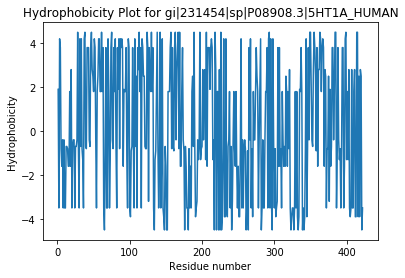

'1.9'

In [10]:
from pylab import *

in_file = open("5HT1A_HUMAN.fasta")

seq = ""
for line in in_file:
    strip_line = line.rstrip()#removes space between lines

    if(strip_line.startswith('>')):
        seqid = strip_line
        seqid = seqid.replace('>','')
    else:
        seq += strip_line
in_file.close()

in_file = open("hydrophobicity_values.txt")
vals_lines = in_file.readlines()
vals = {}  # Initialise the dictionary
for count in range(0, len(vals_lines), 2): 
    vals[vals_lines[count].rstrip()] = vals_lines[count+1].rstrip()
print(vals)
in_file.close()

y_data = []
for count in range(0, len(seq)):  
    aa = seq[count]   
    print (vals[aa]+",", end="")
    y_data.append(float(vals[aa]))
x_data = range(1, len(y_data)+1)

plot(x_data, y_data)

xlabel("Residue number")
ylabel("Hydrophobicity")
title("Hydrophobicity Plot for "+seqid)
show()

#convert to float

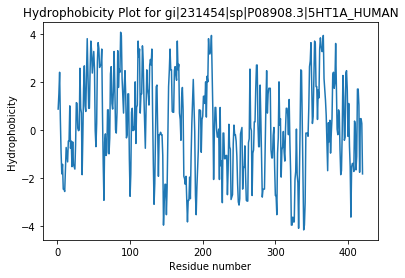

In [101]:
from pylab import *

in_file = open("5HT1A_HUMAN.fasta")

seq = ""
for line in in_file:
	strip_line = line.rstrip()
	if(strip_line.startswith('>')):
		seqid = strip_line
		seqid = seqid.replace('>','')
	else:
		seq += strip_line
in_file.close()

in_file = open("hydrophobicity_values.txt")
vals_lines = in_file.readlines()

vals = {}  # Initialise the dictionary
for count in range(0, len(vals_lines), 2): 
	vals[vals_lines[count].rstrip()] = vals_lines[count+1].rstrip()

in_file.close()

y_data = []
for count in range(1, len(seq)-1):  
	left_aa = seq[count-1]   
	center_aa = seq[count]   
	right_aa = seq[count+1]   
	average = (float(vals[left_aa]) + float(vals[center_aa]) + float(vals[right_aa])) / 3 
	y_data.append(average)


x_data = range(1, len(y_data)+1)

plot(x_data, y_data)

xlabel("Residue number")
ylabel("Hydrophobicity")
title("Hydrophobicity Plot for "+seqid)
show()


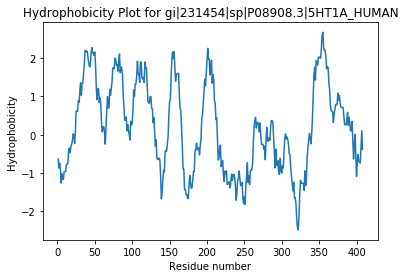

In [102]:
from pylab import *

in_file = open("5HT1A_HUMAN.fasta")

seq = ""
for line in in_file:
    strip_line = line.rstrip()
    if(strip_line.startswith('>')):
        seqid = strip_line
        seqid = seqid.replace('>','')
    else:
        seq += strip_line
in_file.close()

in_file = open("hydrophobicity_values.txt")
vals_lines = in_file.readlines()

vals = {}  # Initialise the dictionary
for count in range(0, len(vals_lines), 2): 
    vals[vals_lines[count].rstrip()] = vals_lines[count+1].rstrip()	

in_file.close()

y_data = []
for count in range(7, len(seq)-7):
    total = 0
    for count2 in range(-7, 7): 
        total += float(vals[seq[count+count2]])  
    average = total / 15 
    y_data.append(average)


x_data = range(1, len(y_data)+1)

plot(x_data, y_data)

xlabel("Residue number")
ylabel("Hydrophobicity")
title("Hydrophobicity Plot for "+seqid)
show()


---

## ProtScale

---

Plots can be generated online and you can check your plot by generating one with <b>ProtScale</b> at the <b>ExPASy</b> website:

    http://web.expasy.org/protscale

Enter the UniProt/SwissProt ID "5HT1A_HUMAN". This is the human 5-hydroxytryptamine 1A receptor.

Use window size 15, which is appropriate when searching for transmembrane regions and is the value used in your code, and press "Submit".

On the next screen (Selection of endpoints on the sequence) press "Submit" again as you will be searching the whole sequence. 

On the final results screen you will see a number of broad peaks with values above 1.5, corresponding to the transmembrane regions.

Does the plot look the same as yours?

---
<a id='gc_at_plot'></a>
## GC/AT Content Plot
---

## Exercise 23

For this exercise you will need the Entamoeba_Sequence.fasta file, which can be downloaded from the <a href="http://teaching.bc.ic.ac.uk/msc/ipython-files/exercises.html">Exercise Answers</a> page.

The <i>Entamoeba histolytica</i> genome is very AT rich, which can be demonstrated by plotting the GC and AT percentages.

The file <b>Entamoeba_Sequence.fasta</b> contains the sequence of one of the contigs of the sequenced E histolytica genome.

Write a script that uses matplotlib to plot graphs of the GC and AT percentage content of the sequence. 

To identify the percentage content you should use a 100 nucleotide rolling window and your plots should display the percentage GC and AT for each 100 nucleotides.  The rolling window should measure each consecutive 100 nucleotides i.e 1-100, 101-200, 201-300 etc

You may find it helpful to look at the matplotlib (http://matplotlib.org) web site, in particular http://matplotlib.org/users/pyplot_tutorial.html

(Answers to all exercises are available <a href="http://teaching.bc.ic.ac.uk/msc/ipython-files/exercises.html">here</a>.)


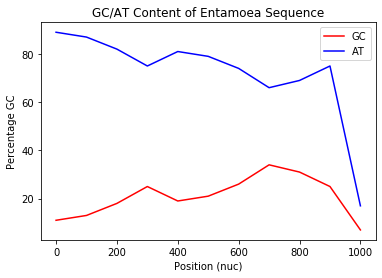

In [7]:
import matplotlib.pyplot as plt
import re

# The script creates a function to produce the plot
def plotGC(seq):
    # Comple REs to identify the nucleotides
    c = re.compile("C")
    g = re.compile("G")
    a = re.compile("A")
    t = re.compile("T")

    # Initialise lists for the plot data
    x_data = []
    y_data = []
    y_data2 = []

    # Work through the sequence, slicing 100 nucleotides at a time
    for pos in range(0, len(seq), 100):
        subseq = seq[pos:pos+100]

        # Use subn to count the matches for each nucleotide
        gc = g.subn("G", subseq)[1]
        gc += c.subn("C", subseq)[1]
        at = a.subn("A", subseq)[1]
        at += t.subn("T", subseq)[1]

        # Append the data to the plot lists
        x_data.append(pos)
        y_data.append(gc)
        y_data2.append(at)

    # Create and display the plot, with a legend
    plt.plot(x_data, y_data, 'r', label='GC')
    plt.plot(x_data, y_data2, 'b', label='AT')
    plt.xlabel("Position (nuc)")
    plt.ylabel("Percentage GC")
    plt.legend(loc='upper right')
    plt.title("GC/AT Content of Entamoea Sequence")

    plt.show()

# Open the sequence file and strip off the header line
seqfile = open('Entamoeba_Sequence.fasta')
seq_lines = seqfile.readlines()
# print(seq_lines)
seq_lines.pop(0)


# Create the sequence string, ensuring it is upper case
# to match the RE nucleotide definitions
seq = ''
for line in seq_lines:
    seq += line.rstrip().upper()
# Call the plotting function
# print(seq)
plotGC(seq)



---

<b>Note: If you have installed Anaconda then NumPy, Pandas and Matplotlib are included.</b>

---

<b>The fourth part of the Python tutorial is available <a href="PythonTutorial_Pt4.ipynb">here</a>.</b><br><br>